In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-15 to 2019-07-12 - 77


In [3]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.1)]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

61


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EMLC,36,0.989042,0.835464,1.136326,7.021613,1.334553
VCLT,36,0.818250,1.121605,0.694154,5.361095,2.439522
BLV,36,0.737918,1.113935,0.626818,4.503085,2.488783
TLT,36,0.676172,1.417200,0.449117,3.657498,3.084717
SPTL,36,0.671298,1.360872,0.464125,3.637486,2.930501
EMB,36,0.581651,0.832835,0.650752,4.326756,1.290153
VWOB,36,0.569803,0.646232,0.820326,4.169122,0.829215
LQD,36,0.563341,0.775537,0.675221,3.661071,1.584890
CWB,36,0.496125,1.318176,0.346268,3.506925,3.517511


{'BNDX': 0.561, 'EMLC': 0.19, 'NUV': 0.248} 0.495


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,0.494926,0.297060,-0.108612,0.287839,0.508001,0.735110,1.022036,1.532498,3.417618,0.281496
EMLC,36.0,0.989042,0.835464,-0.940261,0.398100,0.863776,1.675241,2.768686,1.136326,7.021613,1.334553
BNDX,36.0,0.376628,0.323826,-0.590688,0.207647,0.430821,0.604069,0.830923,1.040512,2.411216,0.711435
NUV,36.0,0.384022,0.657418,-0.785086,-0.071645,0.344054,0.984260,1.499999,0.523776,2.933071,0.982324


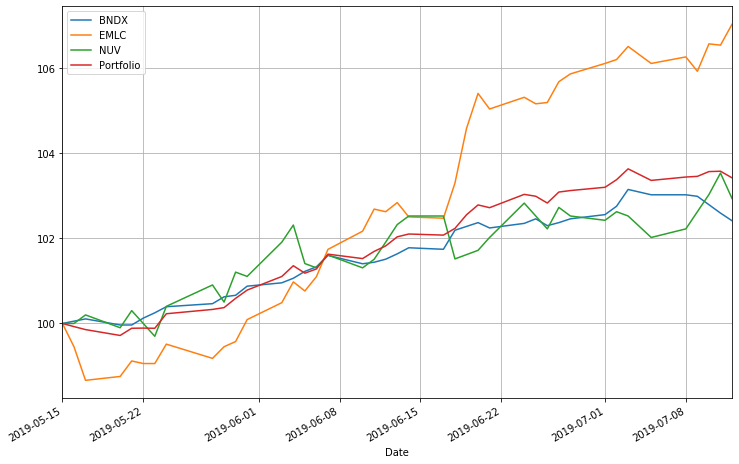

In [5]:
quote.setup_mask(['BNDX', 'EMLC', 'NUV'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)

evicted PZA 0.765 -0.300
evicted BSCK 0.795 -0.135
evicted IBDL 0.730 -0.103
evicted VCLT 0.780 -0.137
evicted BWX 0.678 0.039
evicted EMB 0.769 -0.475
evicted TFI 0.333 -0.181
evicted CWB 0.529 -0.492
evicted NUV 0.264 -0.223
retry backlogs ['HYLS', 'AGG', 'SCHR', 'VGSH', 'CMF', 'ISTB', 'BIV', 'VCSH', 'SHY', 'VGIT', 'TDTT', 'IPE', 'TIP', 'BND', 'LQD', 'SLQD', 'IGSB', 'BSJK', 'SCHO', 'SPTS', 'LMBS', 'STIP', 'IEI', 'MBB', 'SPTL', 'IGIB', 'VTIP', 'MUB', 'SJNK', 'BSV', 'HYLB', 'VMBS', 'HYG', 'GOVT', 'SHYG', 'USIG', 'SPSB', 'IEF', 'SPIB', 'SCHP', 'JNK', 'SCHZ', 'ITM', 'VTEB', 'VCIT', 'TLT', 'BLV', 'VWOB', 'HYS'] at 0.805/-0.51 - 1.464
evicted LMBS 0.753 0.010
evicted IPE 0.803 -0.100
evicted HYS 0.729 -0.458
evicted VWOB 0.778 -0.068
evicted TLT 0.662 0.053
evicted EMLC 0.391 -0.027
retry backlogs ['STIP', 'VCSH', 'SHY', 'GOVT', 'VMBS', 'VTIP', 'MBB', 'IEI', 'MUB', 'AGG', 'VGSH', 'BSV', 'SLQD', 'TDTT', 'BND', 'SCHO', 'SPTL', 'SCHR', 'TIP', 'SPTS', 'BSJK', 'IGIB', 'VTEB', 'HYLS', 'VGIT', 'U

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,0.529214,0.319773,-0.168285,0.300766,0.510042,0.808640,1.090847,1.530872,3.675837,0.349017
EMLC,36.0,0.989042,0.835464,-0.940261,0.398100,0.863776,1.675241,2.768686,1.136326,7.021613,1.334553
BNDX,36.0,0.376628,0.323826,-0.590688,0.207647,0.430821,0.604069,0.830923,1.040512,2.411216,0.711435
NUV,36.0,0.384022,0.657418,-0.785086,-0.071645,0.344054,0.984260,1.499999,0.523776,2.933071,0.982324


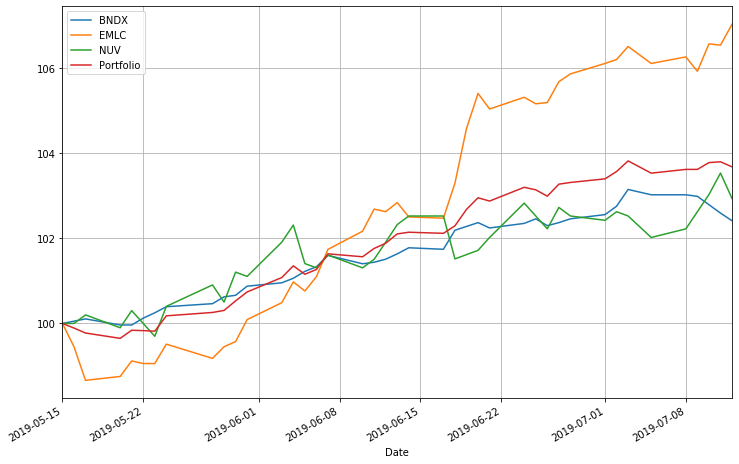

In [6]:
bounds = 0.4, 0.6
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=1, bounds=bounds)
quote.setup_mask(['BNDX', 'EMLC', 'NUV'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)